In [2]:
import pandas as pd
import numpy as np

# Data prep

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [ ]:
!wget $data

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.title().str.replace(' ', '_')

In [6]:
df.dtypes[df.dtypes == 'object']  # returns only columns that its type is object 

Make                 object
Model                object
Engine_Fuel_Type     object
Transmission_Type    object
Driven_Wheels        object
Market_Category      object
Vehicle_Size         object
Vehicle_Style        object
dtype: object

In [7]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_Hp,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_Of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_Mpg,City_Mpg,Popularity,Msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data analysis

In [10]:
 for col in df.columns:  # we need to see data
        print(col + ':')
        print()
        print('values: ' + str(df[col].unique()[:5]))
        print()
        print('type of column: ' + str(df[col].dtype))
        print()
        print('unique values: ' + str(df[col].nunique()))
        print()
        print('--------------------------------------')

Make:

values: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

type of column: object

unique values: 48

--------------------------------------
Model:

values: ['1_series_m' '1_series' '100' '124_spider' '190-class']

type of column: object

unique values: 914

--------------------------------------
Year:

values: [2011 2012 2013 1992 1993]

type of column: int64

unique values: 28

--------------------------------------
Engine_Fuel_Type:

values: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

type of column: object

unique values: 10

--------------------------------------
Engine_Hp:

values: [335. 300. 230. 320. 172.]

type of column: float64

unique values: 356

--------------------------------------
Engine_Cylinders:

values: [ 6.  4.  5.  8. 12.]

type of column: float64

unique values: 9

--------------------------------------
Transmission_Type:

values: ['manual' 'automatic' 'automated_manual' 'direct_

In [11]:
df

,Make,Model,Year,Engine_Fuel_Type,Engine_Hp,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_Of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_Mpg,City_Mpg,Popularity,Msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [12]:
import matplotlib.pyplot as pit
import seaborn as sns

In [13]:
%matplotlib inline

<AxesSubplot:xlabel='Msrp', ylabel='Count'>

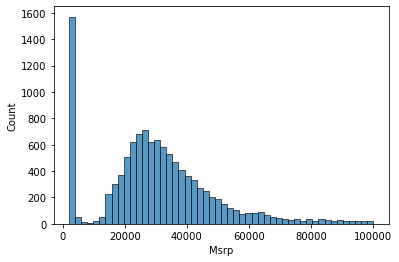

In [14]:
sns.histplot(df.Msrp[df.Msrp < 100000], bins=50)

In [15]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [16]:
price_logs = np.log1p(df.Msrp) # we log-transformed our price log to make the data more normalized

<AxesSubplot:xlabel='Msrp', ylabel='Count'>

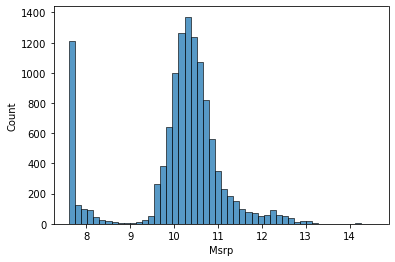

In [17]:
sns.histplot(price_logs, bins = 50) 

In [18]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_Hp              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_Of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
Highway_Mpg             0
City_Mpg                0
Popularity              0
Msrp                    0
dtype: int64

until here is a simple plain data analysis

# Validation framework

In [834]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [835]:
n, n_val + n_test + n_train

(11914, 11914)

In [836]:
n_val , n_test, n_train

(2382, 2382, 7150)

In [837]:
df_train = df.iloc[:n_train] # training data from (0 to 7150)
df_val = df.iloc[n_train:n_train + n_val] # validation data from (7150 to 9532)
df_test = df.iloc[n_train + n_val:] # testing data from (9532 to 11914)
# before shuffling

In [838]:
idx = np.arange(n)

In [839]:
np.random.seed(2)
np.random.shuffle(idx)

In [840]:
idx[n_train:]

array([2779, 3708, 4794, ..., 6637, 2575, 7336])

In [841]:
df_train = df.iloc[idx[:n_train]] # training data from (0 to 7150)
df_val = df.iloc[idx[n_train:n_train + n_val]] # validation data from (7150 to 9532)
df_test = df.iloc[idx[n_train + n_val:]] # testing data from (9532 to 11914)
# after shuffling

In [842]:
df.iloc[idx[:10]]

,Make,Model,Year,Engine_Fuel_Type,Engine_Hp,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_Of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_Mpg,City_Mpg,Popularity,Msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [843]:
df_train.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_Hp,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_Of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_Mpg,City_Mpg,Popularity,Msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [844]:
len(df_train), len(df_val), len(df_test) # checking validation framework (60, 20, 20)

(7150, 2382, 2382)

In [845]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
# reset index 

In [846]:
y_train = np.log1p(df_train.Msrp.values)
y_val = np.log1p(df_val.Msrp.values)
y_test = np.log1p(df_test.Msrp.values)
# and we log-transformed the shuffled data to make it more normalized


In [847]:
del df_train['Msrp']
del df_val['Msrp']
del df_test['Msrp']
# we deleted the original validation framework(made before shuffling)
# so this data doesn't mess up our model 


In [848]:
len(y_train) # checking the value of training data (60% of our shuffled data)

7150

# Linear Regression 

In [849]:
df_train.iloc[10]

Make                                 rolls-royce
Model                     phantom_drophead_coupe
Year                                        2015
Engine_Fuel_Type     premium_unleaded_(required)
Engine_Hp                                  453.0
Engine_Cylinders                            12.0
Transmission_Type                      automatic
Driven_Wheels                   rear_wheel_drive
Number_Of_Doors                              2.0
Market_Category        exotic,luxury,performance
Vehicle_Size                               large
Vehicle_Style                        convertible
Highway_Mpg                                   19
City_Mpg                                      11
Popularity                                    86
Name: 10, dtype: object

In [850]:
xi = [375, 13, 3916]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [851]:
def linear_regression(xi): # LR = w0 + w1.x1 + w2.x2 + ...)
    n = len(xi) 
    
    pred = w0
    
    for j in range(n): # j from (0, 2)
        pred = pred + w[j] * xi[j] # w0 = w0 + xi[X] * w[X]
                                   # where X is from 0 to 2        
    return pred

In [852]:
LR = linear_regression(xi)
LR

19.272

In [853]:
ex = np.expm1(LR)
ex

234273547.20837635

In [854]:
np.log1p(ex)

19.272

# Linear Regression vector form

LR = w0 + xiT.w 

In [855]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [856]:
def linear_regression(xi):   #another way to calculate LR       
    return w0 + dot(xi, w)

In [857]:
linear_regression(xi)

19.272

In [858]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [859]:
def linear_regression(xi):  #LR = w0 + xiT.w 
    xi = [1] + xi    # xi0 always equals 1
    return dot(xi, w_new)

In [860]:
linear_regression(xi)

19.272

In [861]:
xi = [375, 13, 3916]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [862]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 24, 1385]
x10 =[1, 375, 13, 3916]

In [863]:
x = [x1, x2, x10]
X = np.array(x)
X 

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 1385],
       [   1,  375,   13, 3916]])

In [864]:
def linear_regression(X):
    return X.dot(w_new)

In [865]:
linear_regression(X)

array([12.38 , 12.22 , 19.272])

# Linear regression Model

w = (xTx)^-1).xT.y  (normal equation)

In [866]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

In [867]:
X = np.array(X)

In [868]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [869]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [870]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [871]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [872]:
w0 = w_full[0]
w = w_full[1:]

In [873]:
w0, w

(25844.754055766807, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [874]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [875]:
train_linear_regression(X, y)

LinAlgError: Singular matrix

# Car price baseline model

In [876]:
df_train.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_Hp',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_Of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'Highway_Mpg', 'City_Mpg', 'Popularity'],
      dtype='object')

In [877]:
base = ['Engine_Hp', 'Engine_Cylinders', 'Highway_Mpg', 'City_Mpg', 'Popularity']
x_train = df_train[base].fillna(0).values   
w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_train.dot(w) # pred = w0 + xw 

<AxesSubplot:ylabel='Count'>

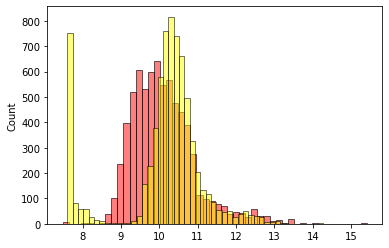

In [878]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='yellow', alpha=0.5, bins=50)

# RMSE (Root Mean Squared Error)

RMSE = root(mean * (g(xi) - yi)^2)

In [879]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [880]:
rmse(y_train, y_pred)

0.7554192603920132

In [881]:
def prepare_x(df):
    df_num = df[base].fillna(0)
    x = df_num.values
    return x

In [882]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred) 

0.7616530991301591

# Simple feature engineering

In [883]:
2017 - df_train.Year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: Year, Length: 7150, dtype: int64

In [884]:
def prepare_x(df):
    df = df.copy()
    
    df['Age'] = 2017 - df.Year
    features = base + ['Age']
    
    df_num = df[features].fillna(0)
    x = df_num.values
    
    return x

In [885]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred) 

0.5172055461058329

<AxesSubplot:ylabel='Count'>

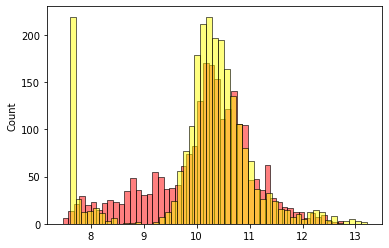

In [886]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='yellow', alpha=0.5, bins=50)

# Categorical variables

In [957]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['Age'] = 2017 - df.Year
    features.append('Age')
    
    for v in [2, 3, 4]:
        df['num_door_%s' %v] = (df.Number_Of_Doors == v).astype('int')
        features.append('num_door_%s' %v)
        
    df_num = df[features].fillna(0)
    x = df_num.values
    
    return x

In [958]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

0.5157995641503232

0.5172055461058329

In [959]:
car_makes = list(df.Make.value_counts().head().index)

In [960]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['Age'] = 2017 - df.Year
    features.append('Age')
    
    for v in [2, 3, 4]:
        df['Num_Door_%s' %v] = (df.Number_Of_Doors == v).astype('int')
        features.append('Num_Door_%s' %v)
    
    for v in car_makes:
        df['Make_%s' %v] = (df.Make == v).astype('int')
        features.append('Make_%s' %v)
        
    df_num = df[features].fillna(0)
    x = df_num.values
    
    return x

In [961]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

0.5076038849557535

In [962]:
df_train.dtypes

Make                  object
Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_Hp            float64
Engine_Cylinders     float64
Transmission_Type     object
Driven_Wheels         object
Number_Of_Doors      float64
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
Highway_Mpg            int64
City_Mpg               int64
Popularity             int64
dtype: object

In [963]:
df_train['Market_Category'] = df_train['Market_Category'].fillna(0)

In [964]:
categories_variables = [
    'Make',
    'Engine_Fuel_Type', 
    'Transmission_Type', 
    'Driven_Wheels',  
    'Vehicle_Size', 
    'Vehicle_Style',
    'Market_Category'
]

In [965]:
categories = {}

for c in categories_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [966]:
categories

{'Make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'Engine_Fuel_Type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'Transmission_Type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'Driven_Wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'Vehicle_Size': ['compact', 'midsize', 'large'],
 'Vehicle_Style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'Market_Category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback']}

In [967]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    
    df['Age'] = 2017 - df.Year
    features.append('Age')
    
    for v in [2, 3, 4]:
        df['Num_Door_%s' % v] = (df.Number_Of_Doors == v).astype('int')
        features.append('Num_Door_%s' % v)
        
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
        
    df_num = df[features].fillna(0)
    x = df_num.values
    
    return x

In [970]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

280.3729509463764

In [971]:
w0

5.227241467969101e+16

# Regularization (our rmse increased so we need to resolve that)

In [972]:
x = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001]
]
y = [1, 2 ,3, 1, 2, 3]
x = np.array(x)
x

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [973]:
XTX = x.T.dot(x)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [903]:
XTX_inv = np.linalg.inv(XTX)

In [904]:
XTX_inv.dot(x.T).dot(y)

array([ 2.85838502e-01, -5.04106388e+06,  5.04106425e+06])

In [905]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [906]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [907]:
XTX = XTX + 0.01 * np.eye(3)

In [908]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [974]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [975]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(x_train, y_train, r=0.01)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)

rmse(y_val, y_pred)

0.4565219900951977

# Tuning the mode (finding the best value for r)

In [976]:
for r in [0.0, 0.01, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 0.0000001]:
    x_train = prepare_x(df_train)
    w0, w = train_linear_regression_reg(x_train, y_train, r=r)

    x_val = prepare_x(df_val)
    y_pred = w0 + x_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 5.227241467969101e+16 280.3729509463764
0.01 6.276599054495494 0.4565219900951977
1e-05 -0.6697640600470449 0.45651702860983806
0.0001 6.228653587311585 0.4565170597849091
0.001 6.284747189508097 0.4565175081437865
0.1 6.1912087967338945 0.4565692762970132
1 5.634896668678833 0.4572204317994943
10 4.283980108957961 0.4701456932096997
1e-07 81177.10208905759 0.45651339326549667


In [977]:
# 1e-05 -2.1805957174775696 0.45651704979540536

In [978]:
# 1e-06 393.23481890753465 0.4565167346621804

In [979]:
# 1e-07 -101003.3813778662 0.4565165602383768

In [980]:
r = 0.000001
x_train = prepare_x(df_train)
w0, w = train_linear_regression_reg(x_train, y_train, r=r)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)
score = rmse(y_val, y_pred)
score


0.4565171978727543

# Using our model (let's test it for the final time)

In [981]:
df_full_train = pd.concat([df_train, df_val])

In [982]:
df_full_train = df_full_train.reset_index(drop=True)

In [983]:
x_full_train = prepare_x(df_full_train)

In [984]:
x_full_train

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [985]:
y_full_train = np.concatenate([y_train, y_val])

In [986]:
w0, w = train_linear_regression_reg(x_full_train, y_full_train, r=0.0000001)


In [987]:
x_test = prepare_x(df_test)
y_pred = w0 + x_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4517745415785869

<AxesSubplot:ylabel='Count'>

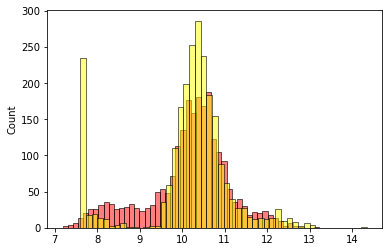

In [988]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='yellow', alpha=0.5, bins=50)

0.4565167346621804  |  0.000001


0.45651704979540536 | 0.0001

0.4522241160109282 test

0.4517745415785869 test 2 (we removed N/A in Market Categories)

0.4470828905825824 test 3 (we introduced 80% of the data for training)

# Let's test it!

In [989]:
car = df_test.iloc[20].to_dict() # data that we didn't train our model on

In [990]:
df_small = pd.DataFrame([car])
df_small

,Make,Model,Year,Engine_Fuel_Type,Engine_Hp,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_Of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_Mpg,City_Mpg,Popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [991]:
x_small = prepare_x(df_small)

In [992]:
y_pred = w0 + x_small.dot(w)
y_pred = y_pred[0]
y_pred = np.expm1(y_pred)
y_pred #pred0

34983.15499291797

In [993]:
np.expm1(y_test[20]) #pred0

35000.00000000001

In [994]:
car1 = df_test.iloc[10].to_dict()

In [995]:
df_small = pd.DataFrame([car1])
df_small

,Make,Model,Year,Engine_Fuel_Type,Engine_Hp,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_Of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_Mpg,City_Mpg,Popularity
0,mazda,3,2016,regular_unleaded,155.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,41,29,586


In [996]:
x_small = prepare_x(df_small)

In [997]:
y_pred = w0 + x_small.dot(w)
y_pred = y_pred[0]
y_pred = np.expm1(y_pred)
y_pred #pred1

23484.309156621228

In [998]:
np.expm1(y_test[10]) #test1

17844.999999999993

In [999]:
car2 = df_test.iloc[5].to_dict()

In [1000]:
df_small = pd.DataFrame([car2])
df_small

,Make,Model,Year,Engine_Fuel_Type,Engine_Hp,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_Of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_Mpg,City_Mpg,Popularity
0,audi,a3,2015,premium_unleaded_(recommended),220.0,4.0,automated_manual,all_wheel_drive,2.0,luxury,compact,convertible,32,23,3105


In [1001]:
x_small = prepare_x(df_small)

In [1002]:
y_pred = w0 + x_small.dot(w)
y_pred = y_pred[0]
y_pred = np.expm1(y_pred)
y_pred  #pred2

38961.2973989305

In [1003]:
np.expm1(y_test[5]) #test2

41149.999999999985

In [1004]:
car3 = df_test.iloc[30].to_dict()

In [1005]:
df_small = pd.DataFrame([car3])

In [1006]:
df_small

,Make,Model,Year,Engine_Fuel_Type,Engine_Hp,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_Of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_Mpg,City_Mpg,Popularity
0,nissan,370z,2015,premium_unleaded_(required),350.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",compact,coupe,26,18,2009


In [1007]:
y_pred = w0 + x_small.dot(w)
y_pred = y_pred[0]
y_pred = np.expm1(y_pred)
y_pred  #pred3

38961.2973989305

In [1008]:
np.expm1(y_test[30])  #test3

45489.99999999997

# Testing customers